In [1]:
import numpy as np
import zig_params as zp
import matplotlib.pyplot as plt
import pandas as pd

# Load example points from text file.
#pts = np.loadtxt("./AraiPlot.txt")

##if using a comma delimited file:

df = pd.read_csv("C:/Users/murray98/Documents/Paleointensity/actual_rocks/arai_plot_points/Arai plot, MMSS06-MMSS06-5B1.csv",delimiter=",")
pts  = df.iloc[:, :3].to_numpy()
# separate x points and y points, shape: (len(pts), 1)
Xpts = pts[:,0:1]
Ypts = pts[:,1:2]
Tlabels = pts[:,2:3]
# Set first and last points of fit
seg_min = 0
seg_max = len(pts)-1

# set criteria, the standard value is 0.1
criteria = 0.1
# calculate ziggie
ziggie, cum_len, arc, RMS = zp.get_ziggie(Xpts, Ypts, seg_min, seg_max)
print(f"Ziggie: {ziggie:0.3f}")
#print(f"RMS: {RMS:0.3f}")


Ziggie: -2.796


Arai data found for: MMSS06-5B1
Sample: MMSS06-5B1
Tstart index: [0]
Tend index: [4]
Ziggie: -2.796, RMS: 0.073


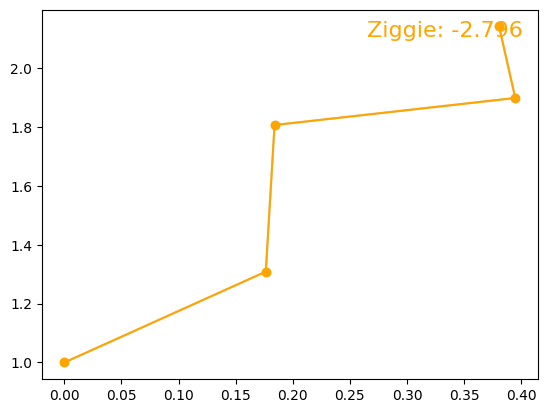

No arai data found for MMSS06-6B3
Arai data found for: MMSS06-5B4
Sample: MMSS06-5B4
Tstart index: [1]
Tend index: [10]
Ziggie: 0.345, RMS: 0.056


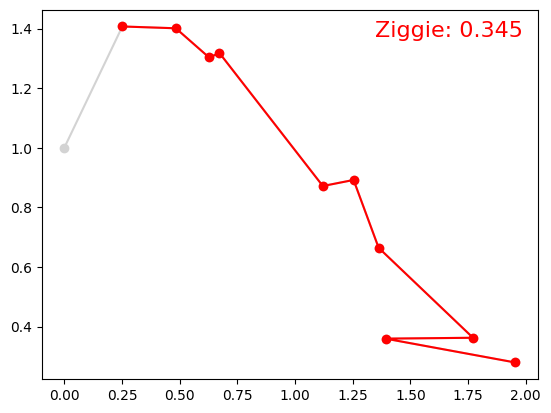

Arai data found for: MMSS12-2A
Sample: MMSS12-2A
Tstart index: [4]
Tend index: [16]
Ziggie: 0.226, RMS: 0.049


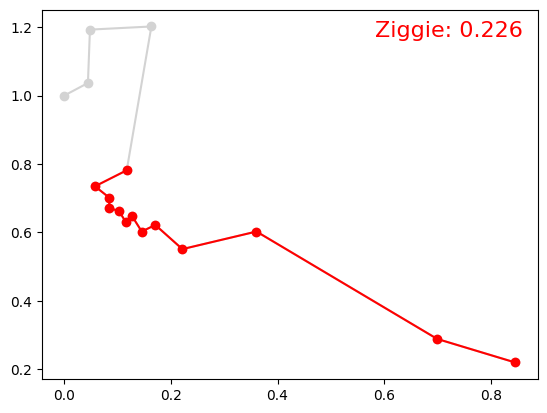

Arai data found for: MMSS12-2B
Arai data found for: MMSS12-2B
Sample: MMSS12-2B
Tstart index: [4]
Tend index: [15]
Ziggie: 0.191, RMS: 0.035


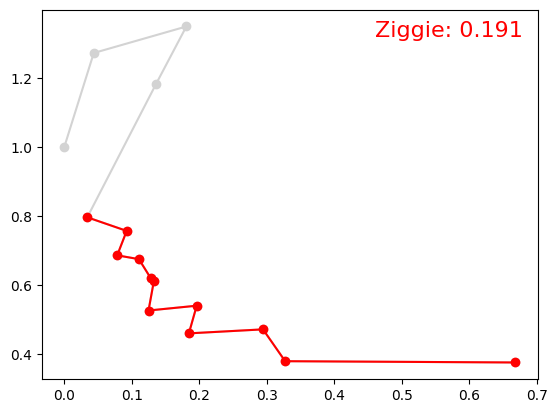

Arai data found for: MMSS12-4B
Sample: MMSS12-4B
Tstart index: [1]
Tend index: [16]
Ziggie: 0.207, RMS: 0.050


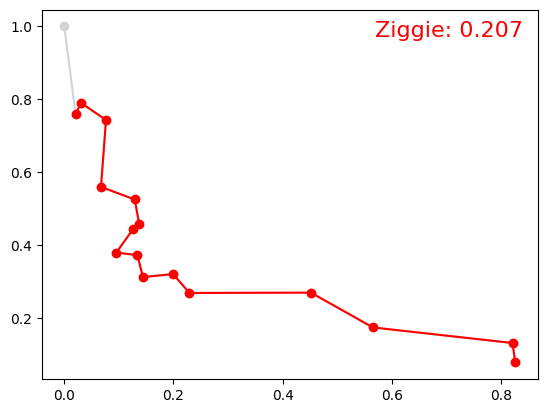

Arai data found for: MMSS12-4C
Sample: MMSS12-4C
Tstart index: [1]
Tend index: [16]
Ziggie: 0.366, RMS: 0.057


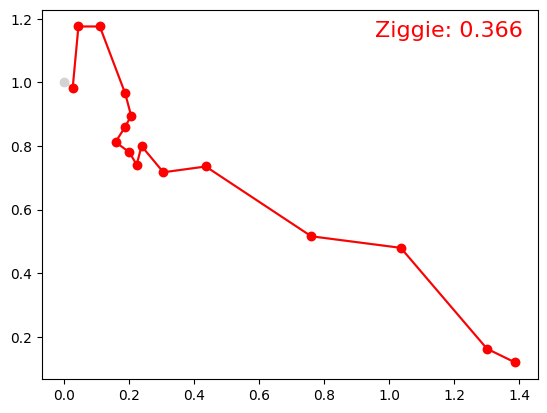

Arai data found for: MMSS12-7D
Sample: MMSS12-7D
Tstart index: [2]
Tend index: [15]
Ziggie: 0.140, RMS: 0.033


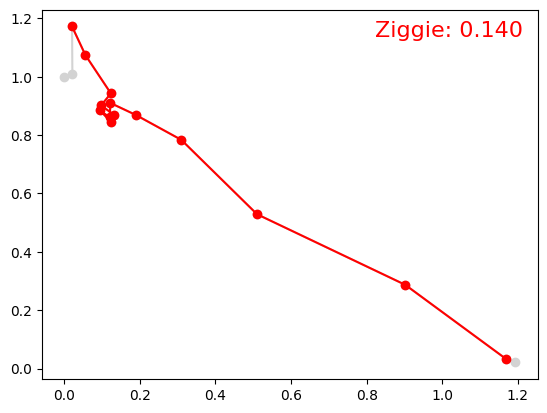

Arai data found for: MMSS12-7F
Sample: MMSS12-7F
Tstart index: [2]
Tend index: [15]
Ziggie: 0.139, RMS: 0.037


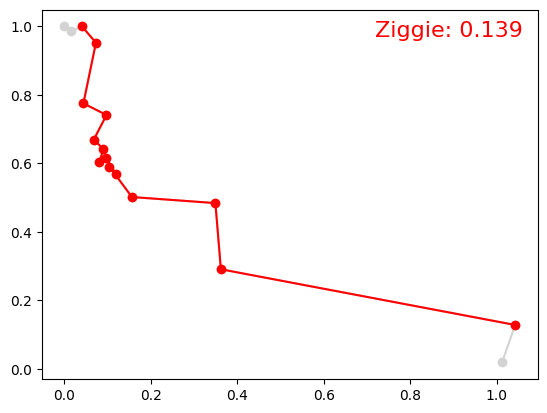

Arai data found for: MMSS12-8B
Sample: MMSS12-8B
Tstart index: [2]
Tend index: [15]
Ziggie: 0.128, RMS: 0.037


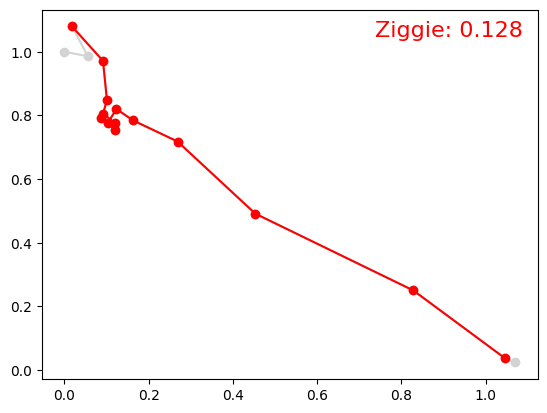

Arai data found for: MMSS12-8F
Sample: MMSS12-8F
Tstart index: [2]
Tend index: [15]
Ziggie: 0.120, RMS: 0.040


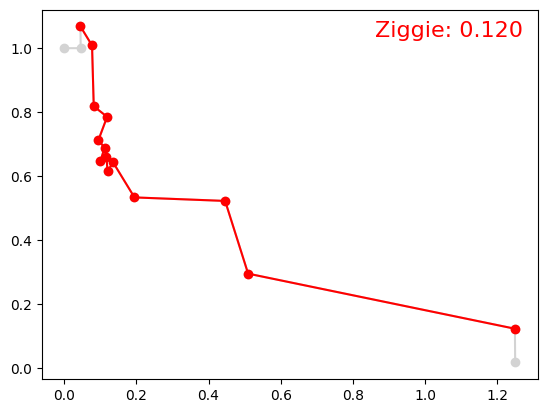

Arai data found for: MMSS12-3Z1
Sample: MMSS12-3Z1
Tstart index: [2]
Tend index: [11]
Ziggie: 0.066, RMS: 0.020


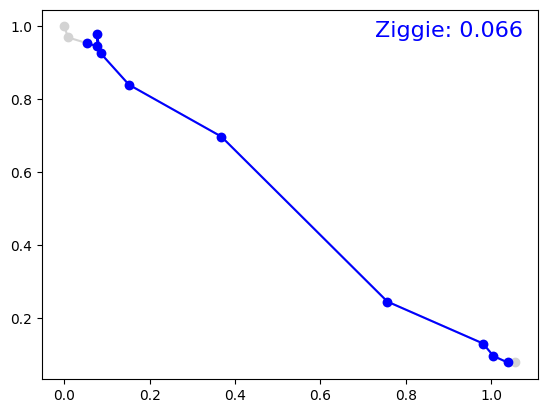

Arai data found for: MMSS12-3Z2
Sample: MMSS12-3Z2
Tstart index: [5]
Tend index: [16]
Ziggie: 0.045, RMS: 0.021


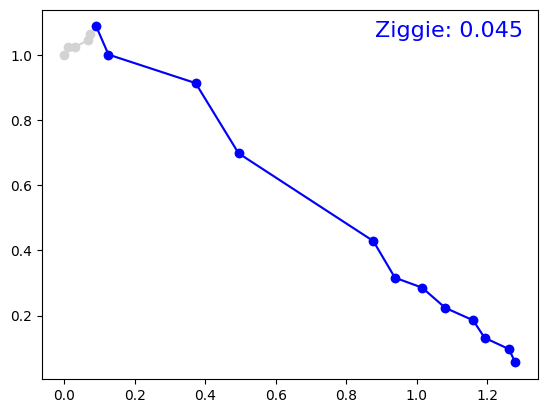

No arai data found for MMSS12-8E4
No arai data found for MMSS12-8E5
No arai data found for MMSS12-8E6
No arai data found for MMSS13-1A
No arai data found for MMSS13-1C
No arai data found for MMSS13-2A
No arai data found for MMSS13-2D
No arai data found for MMSS13-5B
No arai data found for MMSS13-5C
No arai data found for MMSS13-7A
No arai data found for MMSS13-7D
No arai data found for MMSS13-2Z5
No arai data found for MMSS13-2Z6
No arai data found for MMSS13-3D1
No arai data found for MMSS13-3D2
No arai data found for MMSS13-3D4
No arai data found for MMSS13-3D5
No arai data found for MMSS13-3D6
No arai data found for MMSS13-3D7
No arai data found for MMSS13-3Z5
No arai data found for MMSS13-3Z7
No arai data found for MMSS13-3Z8
No arai data found for MMSS13-3Z9
No arai data found for MMSS13-4Z1
No arai data found for MMSS13-4Z2
No arai data found for MMSS15-6D1
No arai data found for MMSS15-7A3
No arai data found for MMSS15-7A4
No arai data found for MMSS15-7A7


In [5]:
import os
import glob
import pandas as pd
import numpy as np

# Load master CSV
master_df = pd.read_csv('Ziggie_calc.csv')

# Path to folder with Arai plot CSVs
folder_path = (
    r'C:/Users/murray98/Documents/Paleointensity/actual_rocks/arai_plot_points/'
)


# Extract Tlabels (rounded third column)
Tlabels = np.round(pts[:, 2])

for _, row in master_df.iterrows():
    sample = str(row['Specimen'])
    Tstart = row['Tstart (°C or J)']
    Tend = row['Tend (°C or J)']

    # Find matching files for this sample
    files = glob.glob(os.path.join(folder_path, "Arai plot, *.csv"))

    found = False
    matched_file = None

    for file in files:
        basename = os.path.basename(file)
        if sample in basename:
            found = True
            matched_file = file
            print(f"Arai data found for: {sample}")
            

    if not found:
        print(f"No arai data found for {sample}")
        continue

    # Load the matched file
    arai_df = pd.read_csv(matched_file)
    pts  = arai_df.iloc[:, :3].to_numpy()
    Xpts = pts[:,0:1]
    Ypts = pts[:,1:2]
    Tlabels = pts[:,2:3]

    # Adjust column name if needed here; assumed 'araiData label' is temperature
    Tlabels = np.round(arai_df['araiData label'].values)

    # Find indices in Tlabels matching rounded Tstart and Tend
    idx_Tstart = np.where(Tlabels == np.round(Tstart))[0]
    idx_Tend = np.where(Tlabels == np.round(Tend))[0]

    print(f"Sample: {sample}")
    print(f"Tstart index: {idx_Tstart}")
    print(f"Tend index: {idx_Tend}")

    seg_min = idx_Tstart[0]
    seg_max = idx_Tend[0]

    #Calculate ziggie
    ziggie, cum_len, arc, RMS = zp.get_ziggie(Xpts, Ypts, seg_min, seg_max)
    print(f"Ziggie: {ziggie:0.3f}, RMS: {RMS:0.3f}")
    # Plotting
    fig, ax = plt.subplots()
    # Plot all points in light gray
    ax.plot(Xpts, Ypts, 'o-', color='lightgray', label="All Points")
    # Highlight current segment
    seg_color = 'red' if ziggie >= criteria else ('orange' if ziggie < 0 else 'blue')
    ax.plot(Xpts[seg_min:seg_max+1], Ypts[seg_min:seg_max+1], 'o-', color=seg_color, label="Fit Segment")
    # Display ziggie value
    ax.text(0.97, 0.97, f"Ziggie: {ziggie:.3f}", transform=ax.transAxes, ha='right', va='top', fontsize=16, color=seg_color)
    plt.show()


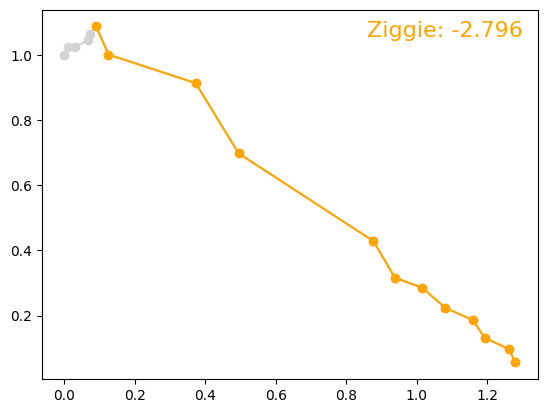

In [3]:
# Plotting
fig, ax = plt.subplots()
# Plot all points in light gray
ax.plot(Xpts, Ypts, 'o-', color='lightgray', label="All Points")
# Highlight current segment
seg_color = 'red' if ziggie >= criteria else ('orange' if ziggie < 0 else 'blue')
ax.plot(Xpts[seg_min:seg_max+1], Ypts[seg_min:seg_max+1], 'o-', color=seg_color, label="Fit Segment")
# Display ziggie value
ax.text(0.97, 0.97, f"Ziggie: {ziggie:.3f}", transform=ax.transAxes, ha='right', va='top', fontsize=16, color=seg_color)
plt.show()

In [4]:
# Calculate ziggie for all fits (with at least 3 points)
n_pts = len(pts)
# option to show RMS values
show_rms = True

# Iterate over all valid segments with at least 3 points
for seg_min in range(n_pts - 2):
    for seg_max in range(seg_min + 2, n_pts):
        # Calculate ziggie for the current segment
        ziggie, cum_len, arc, RMS = zp.get_ziggie(Xpts, Ypts, seg_min, seg_max)

        # Print ziggie output
        print(f"start={seg_min}, end={seg_max}, Ziggie: {ziggie:0.3f}", end="")
        if show_rms == True:
            print(f" RMS: {RMS:0.3f}")
        # Add if fit passes
        if ziggie <= criteria:
            if ziggie < 0:
                print("  - CAUTION (ziggie less than zero)")
            else:
                print("  - PASS")

        else:
            print()

start=0, end=2, Ziggie: -3.841 RMS: 0.000
  - CAUTION (ziggie less than zero)
start=0, end=3, Ziggie: -4.889 RMS: 0.005
  - CAUTION (ziggie less than zero)
start=0, end=4, Ziggie: 0.002 RMS: 0.006
  - PASS
start=0, end=5, Ziggie: 0.002 RMS: 0.007
  - PASS
start=0, end=6, Ziggie: -2.608 RMS: 0.015
  - CAUTION (ziggie less than zero)
start=0, end=7, Ziggie: -2.271 RMS: 0.022
  - CAUTION (ziggie less than zero)
start=0, end=8, Ziggie: 0.037 RMS: 0.021
  - PASS
start=0, end=9, Ziggie: 0.101 RMS: 0.037

start=0, end=10, Ziggie: 0.100 RMS: 0.035

start=0, end=11, Ziggie: 0.112 RMS: 0.034

start=0, end=12, Ziggie: 0.114 RMS: 0.033

start=0, end=13, Ziggie: 0.121 RMS: 0.033

start=0, end=14, Ziggie: 0.120 RMS: 0.032

start=0, end=15, Ziggie: 0.123 RMS: 0.031

start=0, end=16, Ziggie: 0.123 RMS: 0.030

start=1, end=3, Ziggie: -0.000 RMS: 0.000
  - CAUTION (ziggie less than zero)
start=1, end=4, Ziggie: 0.000 RMS: 0.003
  - PASS
start=1, end=5, Ziggie: 0.000 RMS: 0.003
  - PASS
start=1, end=6, Z